<a href="https://colab.research.google.com/github/plaban1981/MachieHack/blob/master/MH_Ecommerce_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(nltk.corpus.stopwords.words('english'))

# tokenizing
from nltk import word_tokenize,sent_tokenize


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Import training and test data

In [0]:
df_train = pd.read_csv('/content/drive/My Drive/NLP Tweets/Train.csv',parse_dates=['Date'])
df_test = pd.read_csv('/content/drive/My Drive/NLP Tweets/Test.csv',parse_dates=['Date'])

## Training Data Statistics

In [484]:
df_train.shape

(2452, 8)

In [485]:
df_train.describe()

,Item_Rating,Selling_Price
count,2452.000000,2452.000000
mean,3.078467,2494.375612
std,1.187137,7115.256516
min,1.000000,33.000000
25%,2.000000,371.000000
50%,3.100000,596.000000
75%,4.100000,1195.250000
max,5.000000,116289.000000


In [486]:
df_train.describe(include='O')

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2
count,2452,2452,2452,2452,2452
unique,2452,1010,75,130,336
top,P-4898,B-3078,clothing,women s clothing,western wear
freq,1,688,717,476,267


In [487]:
df_train.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-02-03,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-07-01,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-01-12,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,2014-12-12,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,470.0


## Check for nullvalues if any in training and test data

In [488]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Series([], dtype: int64)

In [489]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Series([], dtype: int64)

## Visualize the features

In [490]:
df_train['Product_Brand'].value_counts().to_dict()

{'B-3078': 688,
 'B-133': 91,
 'B-2679': 42,
 'B-2372': 40,
 'B-1517': 35,
 'B-2307': 35,
 'B-2741': 30,
 'B-405': 20,
 'B-2355': 16,
 'B-3231': 16,
 'B-3197': 14,
 'B-2373': 13,
 'B-378': 11,
 'B-2895': 10,
 'B-2201': 9,
 'B-2281': 9,
 'B-3215': 8,
 'B-1020': 7,
 'B-334': 7,
 'B-2695': 7,
 'B-1936': 7,
 'B-2370': 7,
 'B-810': 7,
 'B-1': 7,
 'B-1260': 7,
 'B-1315': 6,
 'B-879': 6,
 'B-1466': 6,
 'B-1431': 5,
 'B-1569': 5,
 'B-2326': 5,
 'B-3302': 5,
 'B-119': 5,
 'B-191': 5,
 'B-1154': 5,
 'B-1645': 5,
 'B-850': 5,
 'B-793': 5,
 'B-372': 4,
 'B-1176': 4,
 'B-88': 4,
 'B-1417': 4,
 'B-734': 4,
 'B-80': 4,
 'B-3082': 4,
 'B-748': 4,
 'B-1004': 4,
 'B-3274': 4,
 'B-449': 4,
 'B-786': 4,
 'B-1421': 4,
 'B-3311': 4,
 'B-2344': 4,
 'B-219': 4,
 'B-2415': 4,
 'B-2250': 4,
 'B-1793': 4,
 'B-41': 4,
 'B-1444': 4,
 'B-909': 4,
 'B-1169': 4,
 'B-1993': 4,
 'B-390': 3,
 'B-3187': 3,
 'B-3185': 3,
 'B-86': 3,
 'B-2000': 3,
 'B-2605': 3,
 'B-2204': 3,
 'B-3251': 3,
 'B-3269': 3,
 'B-30': 3,
 'B-63':

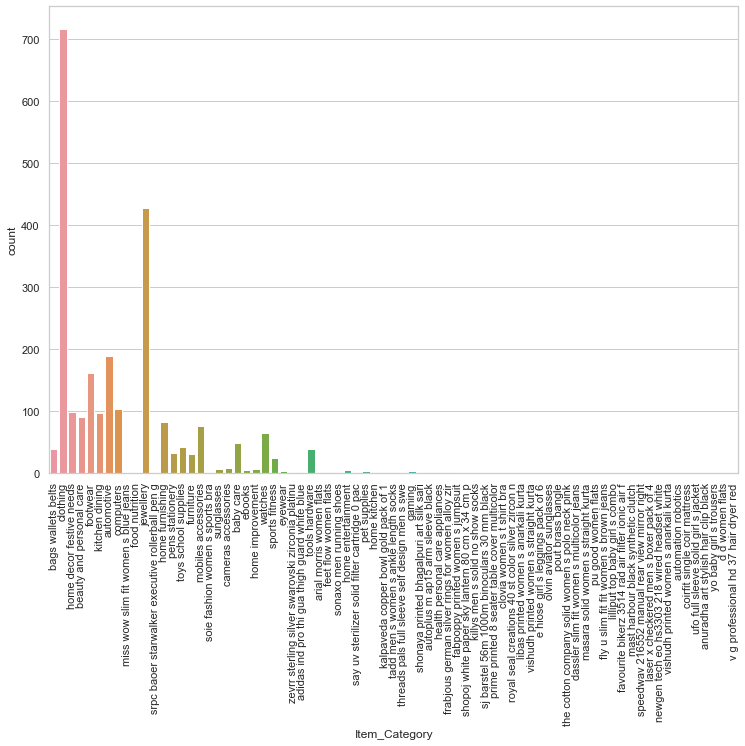

In [0]:
plt.figure(figsize=(11,8))
sns.countplot(df_train['Item_Category'])
plt.xticks(rotation =90)
plt.show()

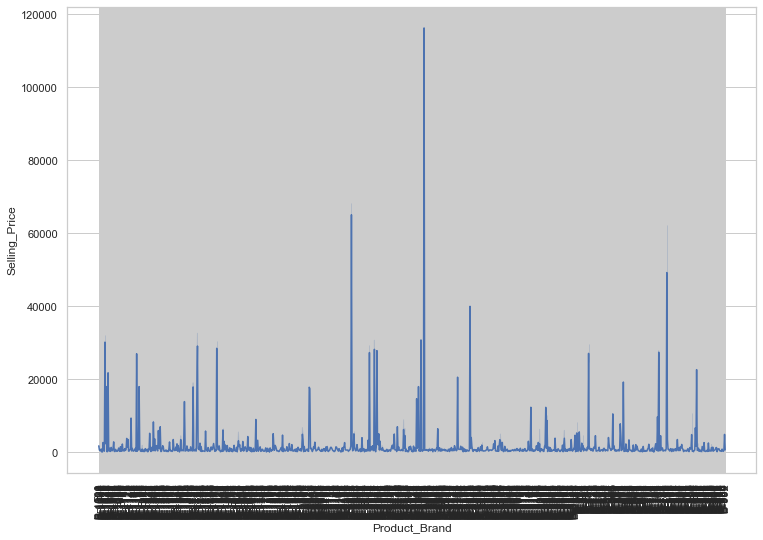

In [0]:
plt.figure(figsize=(11,8))
sns.lineplot(x='Product_Brand',y='Selling_Price',data=df_train)
plt.xticks(rotation =90)
plt.show()

In [13]:
for col in df_train.columns:
    if df_train[col].dtypes == 'O':
        print(f'{col} : unique values : {df_train[col].nunique()}')

Product : unique values : 2452
Product_Brand : unique values : 1010
Item_Category : unique values : 75
Subcategory_1 : unique values : 130
Subcategory_2 : unique values : 336


In [14]:
for col in df_test.columns:
    if df_test[col].dtypes == 'O':
        print(f'{col} : unique values : {df_test[col].nunique()}')

Product : unique values : 1051
Product_Brand : unique values : 494
Item_Category : unique values : 47
Subcategory_1 : unique values : 93
Subcategory_2 : unique values : 194


# Compare train and test data

In [0]:
test_not_train = [ col for col in df_test['Product_Brand'].unique() if col not in df_train['Product_Brand'].unique()]

In [16]:
len(test_not_train) ## 303 brand new in test

303

In [20]:
test_not_train_item = [ col for col in df_test['Item_Category'].unique() if col not in df_train['Item_Category'].unique()]
print(len(test_not_train_item)) ## 20 categories new in test

20


In [21]:
test_not_train_cat1 = [ col for col in df_test['Subcategory_1'].unique() if col not in df_train['Subcategory_1'].unique()]
print(len(test_not_train_cat1)) ## 12 new svubcategory in test

12


In [23]:
test_not_train_sub2 = [ col for col in df_test['Subcategory_2'].unique() if col not in df_train['Subcategory_2'].unique()]
print(len(test_not_train_sub2)) # 59 new sub category 2 in test

59


#### The above observation shows that Test data has newer barnds and item categories

## New Features

In [0]:
df_train['Month'] = df_train['Date'].dt.month


In [0]:
df_test['Month'] = df_test['Date'].dt.month

In [0]:
df_train['Week'] = df_train['Date'].dt.week
df_test['Week'] = df_test['Date'].dt.week

In [0]:
df_train['Year'] = df_train['Date'].dt.year
df_test['Year'] = df_test['Date'].dt.year

In [578]:
df_train.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Month,Week,Year
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-02-03,291.0,2,5,2017
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-07-01,897.0,7,27,2015
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-01-12,792.0,1,2,2019
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,2014-12-12,837.0,12,50,2014
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,470.0,12,50,2013


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09cdcc01d0>,
      dtype=object)

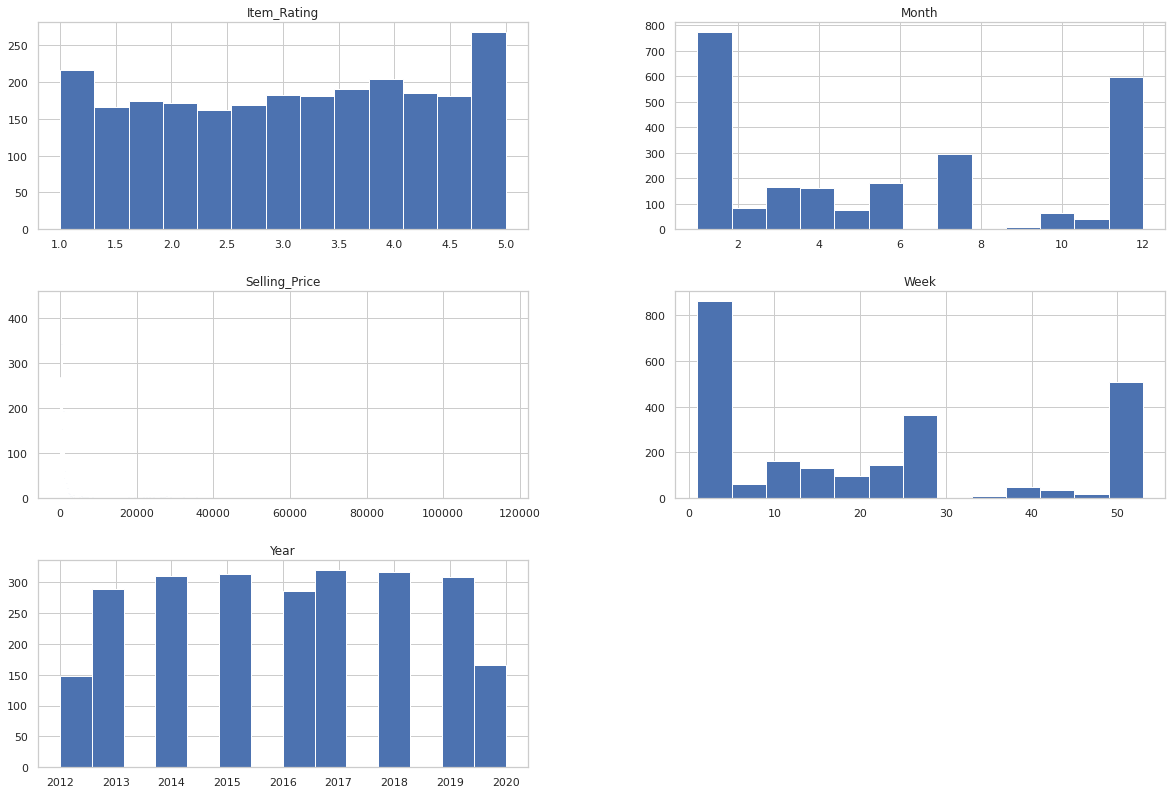

In [309]:
df_train.hist(bins='auto',figsize=(18, 22), layout=(5, 2))

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
pip install catboost

     |████████████████████████████████| 64.8MB 60kB/s 


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

In [311]:
df_train.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Month,Week,Year
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-02-03,291.0,2,5,2017
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-07-01,897.0,7,27,2015
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-01-12,792.0,1,2,2019
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,2014-12-12,837.0,12,50,2014
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,470.0,12,50,2013


In [0]:
df_train['cat_description'] = df_train['Subcategory_1'] + " "+ df_train['Subcategory_2']
df_test['cat_description'] = df_test['Subcategory_1'] + " "+ df_test['Subcategory_2']

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90,min_df=0,max_features=20,stop_words=stop_words)
tfidf_vectorizer.fit(df_train['cat_description'])
tfidf_train = tfidf_vectorizer.transform(df_train['cat_description'])
tfidf_test = tfidf_vectorizer.transform(df_test['cat_description'])
tfidf_train_df = pd.DataFrame(tfidf_train.toarray(),columns=tfidf_vectorizer.get_feature_names())
tfidf_test_df = pd.DataFrame(tfidf_test.toarray(),columns=tfidf_vectorizer.get_feature_names())

In [0]:
new_df = pd.concat([df_train[['Item_Category']],df_test[['Item_Category']]])


cv_model_info = TfidfVectorizer(max_features=200,ngram_range=(1,1))

cv_model_info.fit(new_df['Item_Category'])


word_dict = dict(cv_model_info.vocabulary_)

In [0]:
def return_category_encoded(text):
    for word in text.split(' '):
        if word in word_dict.keys():
            return word_dict[word]
    return -1

In [0]:
df_train['Category_Encoded'] = df_train['Item_Category'].apply(return_category_encoded)
df_test['Category_Encoded'] = df_test['Item_Category'].apply(return_category_encoded)

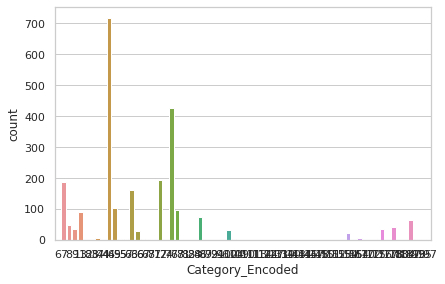

In [571]:
sns.countplot(df_train['Category_Encoded'])

In [0]:
category_encoded_mapper = df_train.groupby('Category_Encoded')['Selling_Price'].median().to_dict()

df_train['Category_Wise_Selling_Price'] = df_train['Category_Encoded'].map(category_encoded_mapper)
df_test['Category_Wise_Selling_Price'] = df_test['Category_Encoded'].map(category_encoded_mapper)

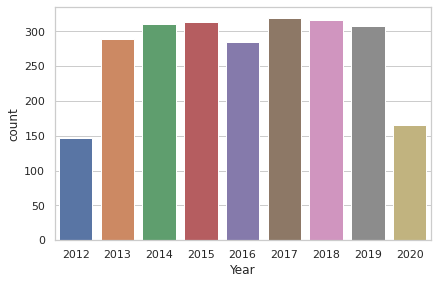

In [54]:
sns.countplot(df_train['Year'])

In [0]:
df_train['Item_encoded'] = pd.factorize(df_train['Item_Category'])[0].tolist()
df_test['Item_encoded'] = pd.factorize(df_test['Item_Category'])[0].tolist()

In [585]:
df_train.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Month,Week,Year,cat_description,Category_Encoded,Category_Wise_Selling_Price,Item_encoded
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-02-03,291.0,2,5,2017,bags hand bags,9,775.0,0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-07-01,897.0,7,27,2015,women s clothing western wear,46,540.0,1
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-01-12,792.0,1,2,2019,showpieces ethnic,72,784.0,2
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,2014-12-12,837.0,12,50,2014,eye care h2o plus eye care,13,349.5,3
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,470.0,12,50,2013,men s clothing t shirts,46,540.0,1


In [0]:
## Mapper
item_cat_map = df_train.groupby('Item_encoded')['Selling_Price'].mean().to_dict()


In [0]:
df_train['Avg_item_sp'] = df_train['Item_encoded'].map(item_cat_map)
df_test['Avg_item_sp'] = df_test['Item_encoded'].map(item_cat_map)


In [588]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Series([], dtype: int64)

In [589]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Category_Wise_Selling_Price    13
dtype: int64

In [0]:
#filna
df_test['Avg_item_sp'] = df_test['Avg_item_sp'].fillna(df_test['Avg_item_sp'].median())
df_test['Category_Wise_Selling_Price'] = df_test['Category_Wise_Selling_Price'].fillna(df_test['Category_Wise_Selling_Price'].median())

In [592]:
df_train.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Month,Week,Year,cat_description,Category_Encoded,Category_Wise_Selling_Price,Item_encoded,Avg_item_sp
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2017-02-03,291.0,2,5,2017,bags hand bags,9,775.0,0,1777.842105
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,2015-07-01,897.0,7,27,2015,women s clothing western wear,46,540.0,1,701.516039
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,2019-01-12,792.0,1,2,2019,showpieces ethnic,72,784.0,2,1775.091837
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,2014-12-12,837.0,12,50,2014,eye care h2o plus eye care,13,349.5,3,630.600000
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,2013-12-12,470.0,12,50,2013,men s clothing t shirts,46,540.0,1,701.516039


In [0]:
def format_rating(value):
  if value >= 4.5:
    return 5
  elif value >=3.5:
    return 4
  elif value >= 2.5:
    return 3
  elif value >= 1.5:
    return 2
  else:
    return 1



In [0]:
df_train['Rating'] = df_train['Item_Rating'].map(format_rating)
df_test['Rating'] = df_test['Item_Rating'].map(format_rating)

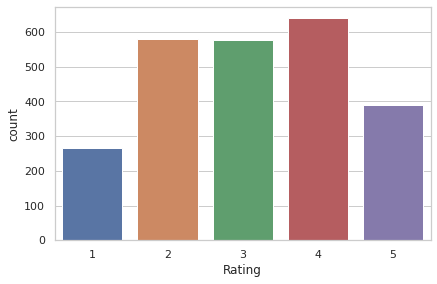

In [521]:
sns.countplot(df_train['Rating'])

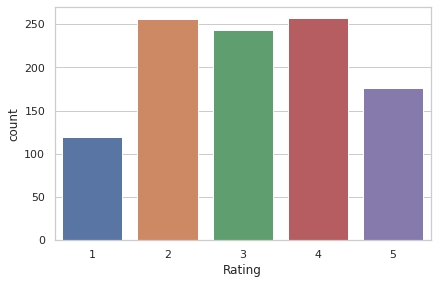

In [522]:
sns.countplot(df_test['Rating'])

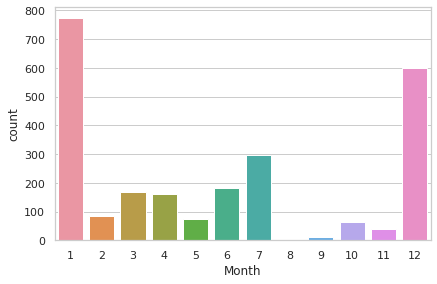

In [55]:
sns.countplot(df_train['Month'])

In [611]:
pd.factorize((df_train['Subcategory_1'])[0])

(array([0, 0, 0, 0]), array(['bags'], dtype=object))

In [0]:
|remove_cols = ['Product',	'Product_Brand',	'Item_Category','Subcategory_1','Subcategory_2','Date','cat_description']

In [0]:
pros_train = df_train.drop(remove_cols,axis=1)
pros_test = df_test.drop(remove_cols,axis=1)

In [0]:
pros_train1 = pd.concat([tfidf_train_df,pros_train],axis=1)
pros_test1 = pd.concat([tfidf_test_df,pros_test],axis=1)

In [597]:
pros_train.head()

,Item_Rating,Selling_Price,Month,Week,Year,Category_Encoded,Category_Wise_Selling_Price,Item_encoded,Avg_item_sp,Rating
0,4.3,291.0,2,5,2017,9,775.0,0,1777.842105,4
1,3.1,897.0,7,27,2015,46,540.0,1,701.516039,3
2,3.5,792.0,1,2,2019,72,784.0,2,1775.091837,4
3,4.0,837.0,12,50,2014,13,349.5,3,630.600000,4
4,4.3,470.0,12,50,2013,46,540.0,1,701.516039,4


In [0]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import KFold
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings
import catboost
warnings.filterwarnings('ignore')

In [615]:
pros_train1.head()

,accessories,bangles,car,chains,clothing,exterior,footwear,interior,men,necklaces,parts,rings,sleep,spare,unknown,watches,wear,western,women,wrist,Item_Rating,Selling_Price,Month,Week,Year,Category_Encoded,Category_Wise_Selling_Price,Item_encoded,Avg_item_sp,Rating
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,4.3,291.0,2,5,2017,9,775.0,0,1777.842105,4
1,0.0,0.0,0.0,0.0,0.420627,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.491969,0.606628,0.461564,0.0,3.1,897.0,7,27,2015,46,540.0,1,701.516039,3
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,3.5,792.0,1,2,2019,72,784.0,2,1775.091837,4
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,4.0,837.0,12,50,2014,13,349.5,3,630.600000,4
4,0.0,0.0,0.0,0.0,0.549949,0.0,0.0,0.0,0.835198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,4.3,470.0,12,50,2013,46,540.0,1,701.516039,4


In [0]:
X = pros_train1.drop('Selling_Price',axis=1)
y = pros_train1['Selling_Price']

In [617]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accessories                  2452 non-null   float64
 1   bangles                      2452 non-null   float64
 2   car                          2452 non-null   float64
 3   chains                       2452 non-null   float64
 4   clothing                     2452 non-null   float64
 5   exterior                     2452 non-null   float64
 6   footwear                     2452 non-null   float64
 7   interior                     2452 non-null   float64
 8   men                          2452 non-null   float64
 9   necklaces                    2452 non-null   float64
 10  parts                        2452 non-null   float64
 11  rings                        2452 non-null   float64
 12  sleep                        2452 non-null   float64
 13  spare             

Running 1 iteration
Running 2 iteration
Running 3 iteration
Running 4 iteration
Running 5 iteration
Running 6 iteration
Running 7 iteration
Running 8 iteration
Running 9 iteration
Running 10 iteration
-----------KFOLD--------------
AxesSubplot(0.08,0.07;0.87x0.81)
0.6905001420748301 0.7836197841657914 0.7390905224790763


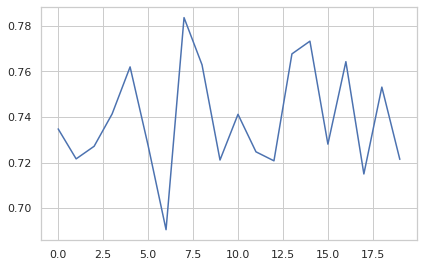

In [627]:
iterations = 10
scores = []
scores_val = []
target = y
temp = X
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = KFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        

        
        model1  = lgb.LGBMRegressor(max_depth=3,n_estimators=75,random_state=60)
        model2  = catboost.CatBoostRegressor(max_depth=4,n_estimators=1500,random_state=60)
        model3 = xgb.XGBRegressor(max_depth=5,n_estimators=75,random_state=69,objective='reg:squarederror')
        model4 = RandomForestRegressor(max_depth=4,n_estimators=300,random_state=69)
        model5 = LinearRegression()
        
        
        #model = StackingRegressor(regressors=[model3,model4,model5],meta_regressor=model1)
        model = model1
        
        
        ytrain = np.log(ytrain)
        
        model1.fit(xtrain,ytrain)
            
        preds = model1.predict(xtest)
        #preds = np.where(preds<0,abs(preds),preds)
        
        scores.append(np.sqrt(mean_squared_log_error(ytest,np.exp(preds))))

        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(20)],y=scores))
print(min(scores),max(scores),np.mean(scores))

In [0]:
model  = lgb.LGBMRegressor(max_depth =3 , n_estimators=75,random_state=60)

In [0]:
y1 = np.log(y)

In [630]:
model.fit(X,y1)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=3,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=75, n_jobs=-1, num_leaves=31, objective=None,
              random_state=60, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
xtest = pros_test1[X.columns]

In [0]:
preds = model.predict(xtest)
preds = np.exp(preds)

In [0]:
result = pd.DataFrame(preds,columns=['Selling_Price'])

In [0]:
result.to_excel('sub3.xlsx',index=False)

In [637]:
result.describe()

,Selling_Price
count,1051.000000
mean,1627.345605
std,4519.015584
min,309.457091
25%,495.439959
50%,686.868188
75%,811.734070
max,25795.001625


In [566]:
result.describe()

,Selling_Price
count,1051.000000
mean,933.044304
std,1196.229005
min,204.197206
25%,543.562108
50%,719.238142
75%,921.810301
max,29482.595563


In [0]:
import re
def clean_text(text):
    text = text.lower()
    # remove words with numbers 
    text = re.sub("\s*\d\s*"," ",text)
    # remove special characters if any
    text = re.sub('[^A-Za-z0-9]+'," ",text)
    return text

In [0]:
pros_train['cat_description'] = pros_train['cat_description'].map(clean_text)

In [0]:
pros_test['cat_description'] = pros_test['cat_description'].map(clean_text)

In [319]:
pros_train.head()

,Item_Category,Item_Rating,Selling_Price,Month,Week,Year,cat_description
0,bags wallets belts,4.3,291.0,2,5,2017,bags hand bags
1,clothing,3.1,897.0,7,27,2015,women s clothing western wear
2,home decor festive needs,3.5,792.0,1,2,2019,showpieces ethnic
3,beauty and personal care,4.0,837.0,12,50,2014,eye care h o plus eye care
4,clothing,4.3,470.0,12,50,2013,men s clothing t shirts


In [0]:
pros_test['Selling_Price'] =0
total = pd.concat([pros_train,pros_test],axis=0)

In [321]:
total.shape

(3503, 7)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90,min_df=0,max_features=20,stop_words=stop_words)
tfidf_vectorizer.fit(total['cat_description'])
tfidf_train = tfidf_vectorizer.transform(total['cat_description'])

In [0]:
tfidf_train_df = pd.DataFrame(tfidf_train.toarray(),columns=tfidf_vectorizer.get_feature_names())


In [324]:
tfidf_train_df.shape

(3503, 20)

In [0]:
tfidf_train_df.reset_index(drop=True, inplace=True)
total.reset_index(drop=True, inplace=True)

In [0]:
total_df = pd.concat([tfidf_train_df,total],axis=1)

In [0]:
total_df.drop('cat_description',axis=1,inplace=True)


In [331]:
total_df.head()

,accessories,bangles,car,chains,clothing,exterior,footwear,interior,men,necklaces,parts,rings,sleep,spare,unknown,watches,wear,western,women,wrist,Item_Category,Item_Rating,Selling_Price,Month,Week,Year
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,bags wallets belts,4.3,291.0,2,5,2017
1,0.0,0.0,0.0,0.0,0.420847,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.491887,0.609152,0.458115,0.0,clothing,3.1,897.0,7,27,2015
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,home decor festive needs,3.5,792.0,1,2,2019
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,beauty and personal care,4.0,837.0,12,50,2014
4,0.0,0.0,0.0,0.0,0.546177,0.0,0.0,0.0,0.83767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,clothing,4.3,470.0,12,50,2013


In [440]:
total_df.Item_Rating.unique()

array([4.3, 3.1, 3.5, 4. , 5. , 4.1, 2.4, 2.3, 1.5, 3.6, 4.6, 2.8, 3.2,
       1. , 3.8, 1.7, 3. , 3.7, 1.2, 1.6, 1.4, 2. , 2.1, 2.5, 3.9, 3.4,
       1.8, 3.3, 4.5, 2.6, 4.2, 1.3, 4.7, 2.7, 2.9, 1.1, 2.2, 4.8, 1.9,
       4.4, 4.9])

In [0]:
def ratings(value):
  if value > 4 :
    return 'Excellent'
  elif value >= 3.5 :
    return 'Good'
  elif value >=2.5 :
    return 'Average'
  else:
    return 'Bad'

In [0]:
total_df['Item_Rating'] = total_df['Item_Rating'].map(ratings)

# Label Encoding using pandas

In [0]:
Cat_enc = pd.factorize(total_df['Item_Category'])[0].tolist()

In [0]:
total_df['Item_Category_enc'] = Cat_enc

In [444]:
total_df.head()

,accessories,bangles,car,chains,clothing,exterior,footwear,interior,men,necklaces,parts,rings,sleep,spare,unknown,watches,wear,western,women,wrist,Item_Category,Item_Rating,Selling_Price,Month,Week,Year,Item_Category_enc
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,bags wallets belts,Excellent,291.0,2,5,2017,0
1,0.0,0.0,0.0,0.0,0.420847,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.491887,0.609152,0.458115,0.0,clothing,Average,897.0,7,27,2015,1
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,home decor festive needs,Good,792.0,1,2,2019,2
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,beauty and personal care,Good,837.0,12,50,2014,3
4,0.0,0.0,0.0,0.0,0.546177,0.0,0.0,0.0,0.83767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,clothing,Excellent,470.0,12,50,2013,1


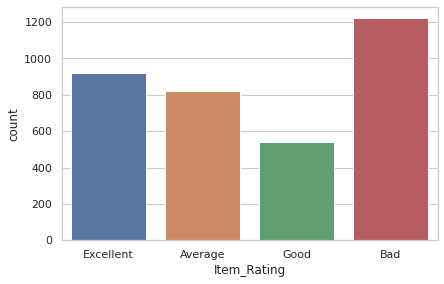

In [445]:
sns.countplot(total_df['Item_Rating'])

In [0]:
final_train = total_df[total_df['Selling_Price'] > 0]
final_test = total_df[total_df['Selling_Price'] == 0]

In [450]:
final_train.shape

(2452, 27)

In [451]:
final_test.shape

(1051, 27)

In [0]:
X = final_train.drop(['Selling_Price','Item_Category'],axis=1)
y = final_train['Selling_Price']

In [447]:
matrix = np.triu(final_train.drop('Item_Category',axis=1).corr(), 1)
matrix

array([[ 0.00000000e+00, -6.95641522e-02,  2.31297254e-01,
        -1.01299347e-01, -2.19413300e-01,  1.73655180e-01,
        -1.02058206e-01,  1.73655180e-01, -9.08168864e-02,
        -1.01906281e-01,  2.31935995e-01, -9.55477291e-02,
        -8.50608014e-02,  2.44169599e-01, -1.20711906e-01,
        -6.32477043e-02, -1.87586157e-01, -1.35052258e-01,
        -2.07709839e-01, -5.80023224e-02, -7.70302658e-03,
        -6.47023370e-02,  1.78839721e-02,  6.92646726e-03,
         1.90429946e-02,  1.17300956e-01],
       [ 0.00000000e+00,  0.00000000e+00, -4.58350222e-02,
        -4.72115502e-02, -1.13688253e-01, -4.19022858e-02,
        -4.75652236e-02, -4.19022858e-02, -5.68025937e-02,
        -4.74944179e-02, -4.73916337e-02, -4.45309525e-02,
        -3.96434174e-02, -4.92364352e-02, -5.62589630e-02,
        -2.94772104e-02, -8.74263607e-02, -6.29424242e-02,
        -9.91400899e-02, -2.97029223e-02,  9.76840114e-03,
        -3.90149479e-02,  2.26850899e-01,  1.29743376e-01,
        -2.55

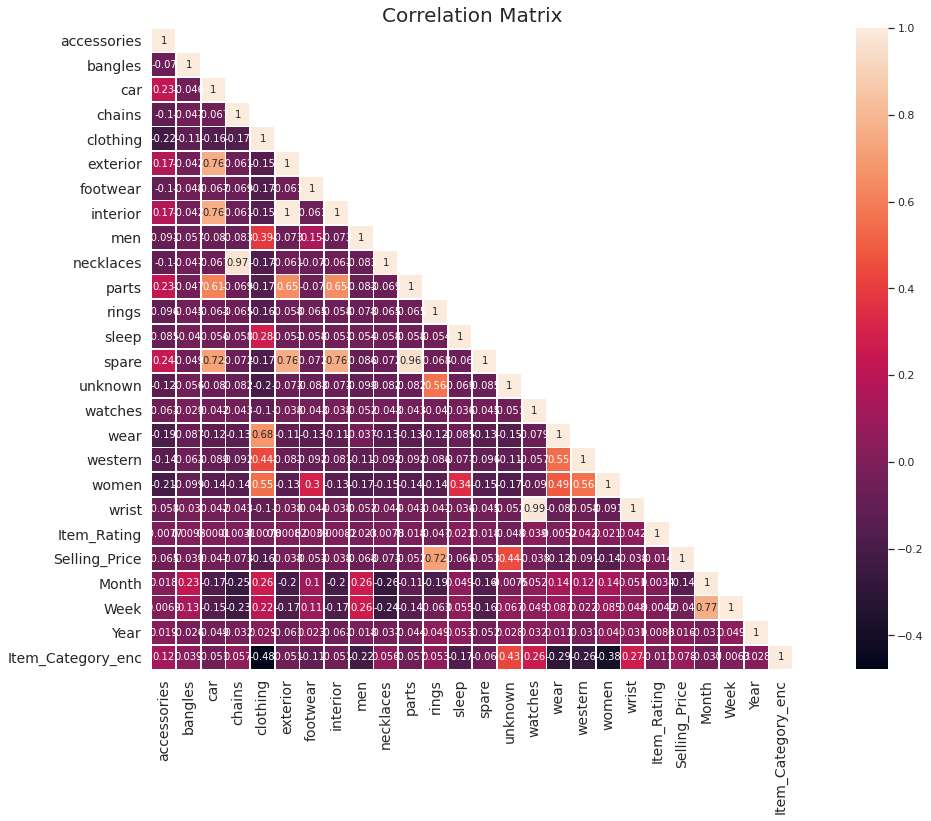

In [448]:
plt.figure(figsize = (20, 11))
sns.heatmap(final_train.drop('Item_Category',axis=1).corr(), annot = True, square = True, mask = matrix, linewidths = 0.7, annot_kws = {'size': 10})
plt.title('Correlation Matrix', fontsize = 20)
plt.tick_params(labelsize = 14)
plt.show()

In [391]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 0 to 2451
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accessories        2452 non-null   float64
 1   bangles            2452 non-null   float64
 2   car                2452 non-null   float64
 3   chains             2452 non-null   float64
 4   clothing           2452 non-null   float64
 5   exterior           2452 non-null   float64
 6   footwear           2452 non-null   float64
 7   interior           2452 non-null   float64
 8   men                2452 non-null   float64
 9   necklaces          2452 non-null   float64
 10  parts              2452 non-null   float64
 11  rings              2452 non-null   float64
 12  sleep              2452 non-null   float64
 13  spare              2452 non-null   float64
 14  unknown            2452 non-null   float64
 15  watches            2452 non-null   float64
 16  wear               2452 

In [456]:
total_df.isnull().sum()[total_df.isnull().sum() > 0]

Series([], dtype: int64)

In [0]:
from sklearn.model_selection import train_test_split,StratifiedKFold
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=1234)

In [0]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [459]:
categorical_features_indices 

array([20, 21, 22, 23, 24])

In [467]:
from sklearn.metrics import mean_squared_log_error
Sk = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
final_score = []
for train_index, test_index in Sk.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  model=CatBoostRegressor(iterations=1000, depth=15, learning_rate=0.01,loss_function='RMSE',verbose=0)
  model.fit(X_train, y_train,cat_features=categorical_features_indices)
  scores = np.sqrt(mean_squared_log_error(y_validation,model.predict(X_validation)))
  final_score.append(scores)
  print(scores)

0.7789744877835139
0.7794232597922746
0.7789590378427517
0.7740814967371858
0.7546290953321976


In [0]:
test_dat = final_test[X.columns]

In [469]:
test_dat.shape

(1051, 25)

In [0]:
y_pred = model.predict(X_test)

In [472]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.813745439690254

In [0]:
selling_price = model.predict(test_dat)

In [0]:
df_test ['Selling_Price'] = selling_price

In [475]:
df_test.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Month,Week,Year,cat_description,Selling_Price
0,P-11284,B-2984,computers,network components,routers,4.3,2018-01-12,1,2,2018,network components routers,2501.906937
1,P-6580,B-1732,jewellery,bangles bracelets armlets,bracelets,3.0,2012-12-20,12,51,2012,bangles bracelets armlets bracelets,647.551397
2,P-5843,B-3078,clothing,women s clothing,western wear,1.5,2014-01-12,1,2,2014,women s clothing western wear,1034.193468
3,P-5334,B-1421,jewellery,necklaces chains,necklaces,3.9,2019-01-12,1,2,2019,necklaces chains necklaces,457.447587
4,P-5586,B-3078,clothing,women s clothing,western wear,1.4,2017-01-12,1,2,2017,women s clothing western wear,1026.540236


In [477]:
selling_price 

array([2501.90693684,  647.55139712, 1034.19346787, ..., 1342.55726621,
        952.27749298, 2071.62382017])

In [0]:
 df_test['Selling_Price'].to_excel('sub1.xlsx',index=False)

In [481]:
df_test['Selling_Price'].shape

(1051,)